Frekvenssijakauma

Kategorisen muttujan frekvenssijakauman taulukkona tai pylväskaaviona

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("white")

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
#Koulutuksen numeroarvojen selitykset
koulutus = ["Peruskoulu", "2. aste", "Korkeakoulu", "Ylempi korkeakoulu"]

In [5]:
#Frekvenssi crosstab() funktiolla

df1 = pd.crosstab(df["koulutus"], columns="f")

df1.columns.name=""

#Tesktimuotoiset arvot numeroiden tilalle
df1.index = koulutus

#Prosentit
n = df1["f"].sum()
df1["%"] = (df1["f"]/n)*100

#Yhteensä rivin lisäys
df1.loc["Yhteensä"] = df1.sum()

df1.style.format({'f':'{:.0f}', '%':'{:.1f} %'})


,f,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %
Yhteensä,81,100.0 %


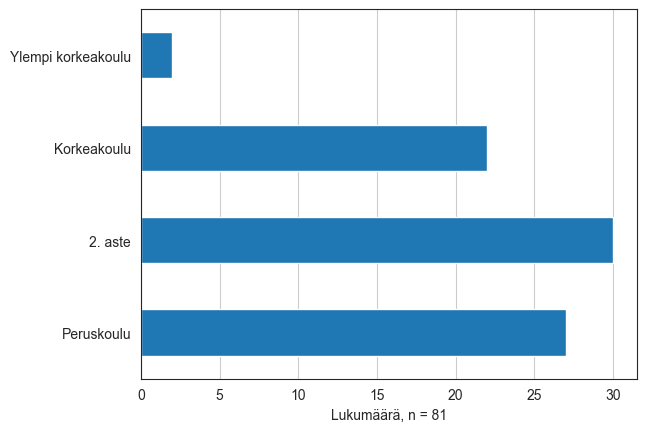

In [8]:
#Kaavio lukumääristä ilman yhteensä rivin tietoja
df1.drop("Yhteensä")["f"].plot(kind="barh")

plt.xlabel(f'Lukumäärä, n = {n}')

#X-akselilta lähtevä gridviivoitus
plt.grid(axis="x")

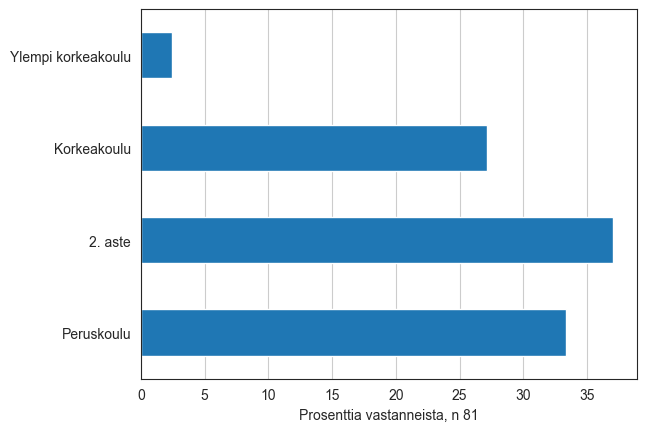

In [9]:
#Prosenteista sama kaavio
df1.drop("Yhteensä")["%"].plot(kind="barh")

plt.xlabel(f'Prosenttia vastanneista, n {n}')
plt.grid(axis="x")

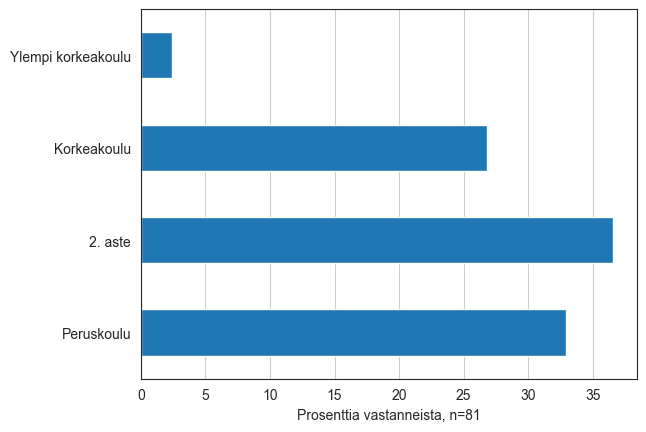

In [12]:
#Sama alkuperäisestä datasta
sns.countplot(data=df, y="koulutus", stat="percent", width=0.5, saturation=1)
plt.ylabel("")
plt.xlabel(f'Prosenttia vastanneista, n={n}')

plt.grid(axis="x")
plt.yticks([0,1,2,3], koulutus)

plt.gca().invert_yaxis()